In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
activities_csv = pd.read_csv('ac_activities_torben_clean_v2.csv')
activities_csv = activities_csv[activities_csv['type'] == 'Run']
activities_csv.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,athlete_count,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url
0,868156484,Run,15.01.2017 06:17:41,6.3,Morning Run,Morning,248.2,26.510,9.36,6.41,...,29,NaN,42663.3,14892,33.176906,-117.335854,(GMT-08:00) America/Los_Angeles,2017-01-15,0.51,https://www.strava.com/activities/868156484
1,868156415,Run,17.01.2017 18:50:18,18.8,Evening Run,Evening,16.1,2.023,7.95,7.55,...,30,NaN,3256.2,1300,32.720301,-117.150205,(GMT-08:00) America/Los_Angeles,2017-01-17,NaN,https://www.strava.com/activities/868156415
2,868156459,Run,19.01.2017 06:35:12,6.6,Morning Run,Morning,87.0,10.091,8.62,6.96,...,1,NaN,16240.6,5271,32.853794,-116.960111,(GMT-08:00) America/Los_Angeles,2017-01-19,0.85,https://www.strava.com/activities/868156459
3,868156435,Run,21.01.2017 07:17:12,7.3,Morning Run,Morning,88.8,11.518,7.71,7.78,...,2,NaN,18535.6,5804,32.758368,-117.242017,(GMT-08:00) America/Los_Angeles,2017-01-21,0.16,https://www.strava.com/activities/868156435
4,868156458,Run,22.01.2017 16:50:51,16.8,Afternoon Run,Afternoon,89.6,10.066,8.90,6.74,...,1,NaN,16199.8,5658,32.853570,-116.960471,(GMT-08:00) America/Los_Angeles,2017-01-22,0.48,https://www.strava.com/activities/868156458


In [3]:
#activities_csv.dtypes

In [4]:
#activities = activities_csv[["type", "start_date_local", "x_start_h", "name_short", "x_min", "x_mi", "x_min/mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count", "distance", "elapsed_time"]].copy()
activities = activities_csv[["x_start_h", "name_short", "x_min", "x_mi", "x_min/mi", "x_mph", "x_max_mph", "total_elevation_gain", "average_heartrate", "max_heartrate", "average_cadence", "elev_low", "elev_high", "athlete_count", "average_temp", "distance", "elapsed_time"]].copy()

activities["pace"] = activities["x_min/mi"]
activities.head()

,x_start_h,name_short,x_min,x_mi,x_min/mi,x_mph,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp,distance,elapsed_time,pace
0,6.3,Morning,248.2,26.510,9.36,6.41,9.17,217.6,NaN,NaN,80.8,-7.1,97.1,29,NaN,42663.3,14892,9.36
1,18.8,Evening,16.1,2.023,7.95,7.55,11.41,0.0,NaN,NaN,84.5,40.7,44.6,30,NaN,3256.2,1300,7.95
2,6.6,Morning,87.0,10.091,8.62,6.96,9.62,137.6,NaN,NaN,84.0,106.0,201.5,1,NaN,16240.6,5271,8.62
3,7.3,Morning,88.8,11.518,7.71,7.78,9.17,29.5,NaN,NaN,84.9,1.3,20.1,2,NaN,18535.6,5804,7.71
4,16.8,Afternoon,89.6,10.066,8.90,6.74,8.50,77.0,NaN,NaN,83.0,96.0,137.9,1,NaN,16199.8,5658,8.90


In [5]:
activities = activities.dropna(how="any")
#activities["start_date_local"] = activities["start_date_local"].apply(pd.to_datetime,errors="coerce")
activities.dtypes

x_start_h               float64
name_short               object
x_min                   float64
x_mi                    float64
x_min/mi                float64
x_mph                   float64
x_max_mph               float64
total_elevation_gain    float64
average_heartrate       float64
max_heartrate           float64
average_cadence         float64
elev_low                float64
elev_high               float64
athlete_count             int64
average_temp            float64
distance                float64
elapsed_time              int64
pace                    float64
dtype: object

In [6]:
#X = activities[["type", "x_start_h", "name_short", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count"]]
#X = activities[["type", "x_start_h", "name_short", "x_min", "x_mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count", "distance", "elapsed_time"]]
#X = activities[["type", "x_start_h", "name_short", "x_mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count"]]
X = activities[["x_start_h", "x_mi", "x_max_mph", "total_elevation_gain", "average_heartrate", "max_heartrate", "average_cadence", "elev_low", "elev_high", "athlete_count", "average_temp"]]

y = activities["pace"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (49, 11) (49, 1)


In [7]:
X.head()

,x_start_h,x_mi,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp
425,6.8,16.053,9.40,204.0,146.3,171.0,83.0,3.0,100.0,1,20.0
437,18.2,0.022,4.92,0.0,58.5,63.0,66.6,143.6,144.6,1,26.0
438,7.6,7.141,10.29,120.0,144.0,161.0,84.0,97.8,213.8,1,17.0
440,11.8,10.010,9.62,103.0,146.2,168.0,85.8,119.4,156.2,1,17.0
444,15.4,5.334,4.47,342.0,95.0,124.0,53.2,191.6,462.8,1,20.0


In [8]:
#print(y)

In [9]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,x_start_h,x_mi,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp
425,6.8,16.053,9.40,204.0,146.3,171.0,83.0,3.0,100.0,1,20.0
437,18.2,0.022,4.92,0.0,58.5,63.0,66.6,143.6,144.6,1,26.0
438,7.6,7.141,10.29,120.0,144.0,161.0,84.0,97.8,213.8,1,17.0
440,11.8,10.010,9.62,103.0,146.2,168.0,85.8,119.4,156.2,1,17.0
444,15.4,5.334,4.47,342.0,95.0,124.0,53.2,191.6,462.8,1,20.0


In [10]:
data_binary_encoded.dtypes

x_start_h               float64
x_mi                    float64
x_max_mph               float64
total_elevation_gain    float64
average_heartrate       float64
max_heartrate           float64
average_cadence         float64
elev_low                float64
elev_high               float64
athlete_count             int64
average_temp            float64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,x_start_h,x_mi,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp
455,15.5,4.052,5.82,0.0,135.7,149.0,80.2,85.0,90.6,1,26.0
440,11.8,10.010,9.62,103.0,146.2,168.0,85.8,119.4,156.2,1,17.0
451,7.4,11.016,9.17,59.0,143.9,164.0,85.3,1.6,17.2,1,15.0
509,11.1,0.659,7.38,3.0,125.4,139.0,83.9,111.4,119.2,1,27.0
510,20.2,3.171,7.61,54.0,138.9,154.0,81.8,111.6,153.2,1,23.0


In [12]:
#StandardScaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

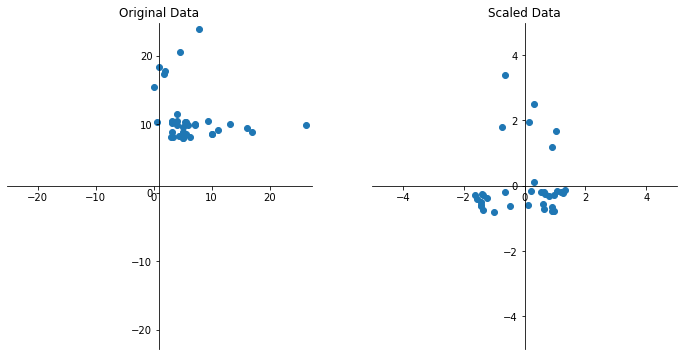

In [14]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["x_mi"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-5, 5)
axes2.set_ylim(-5, 5)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["x_mi"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [15]:
plt.show()

In [16]:
#Step 1) Convert Categorcial data to numbers using Integer or Binary Encoding

X = pd.get_dummies(X)
#X = pd.get_dummies(activities[["x_min", "x_mi", "name_short"]])
y = activities["pace"].values.reshape(-1, 1)
X.head()

,x_start_h,x_mi,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp
425,6.8,16.053,9.40,204.0,146.3,171.0,83.0,3.0,100.0,1,20.0
437,18.2,0.022,4.92,0.0,58.5,63.0,66.6,143.6,144.6,1,26.0
438,7.6,7.141,10.29,120.0,144.0,161.0,84.0,97.8,213.8,1,17.0
440,11.8,10.010,9.62,103.0,146.2,168.0,85.8,119.4,156.2,1,17.0
444,15.4,5.334,4.47,342.0,95.0,124.0,53.2,191.6,462.8,1,20.0


In [17]:
#Step 2) Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
#Step 3) Scale or Normalize your data.  Use StandardScaler if you don't
#know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

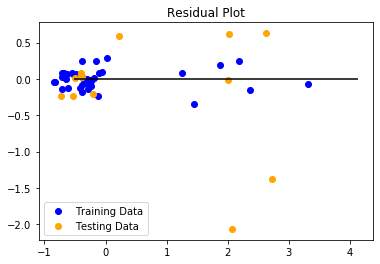

In [19]:
#Step 4) Fit the Model to the scaled training data and make preditions
#using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
#Step 5) Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5754050467855296, R2: 0.7967471989354646


In [21]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5409298615265087, R2: 0.8089250169964288


In [22]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5744471330178381, R2: 0.7970855669382293


In [23]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5538689392136826, R2: 0.8043544908986798
